## Imports

In [1]:
from madgwickahrs import * 
from quaternion import Quaternion
from conversion import * 
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from scipy.stats import norm
from numpy import linalg as LA
from numpy.linalg import inv
import time
from IPython.display import Image as ImageDisp
from sympy import Symbol, symbols, Matrix, sin, cos, latex#, Plot
from sympy.interactive import printing
printing.init_printing()
%pylab inline --no-import-all


Populating the interactive namespace from numpy and matplotlib


In [2]:
dt = 0.025

# Rotational and Translational Motion

## Read Files

In [3]:
trajectory_file = open("/Users/eunsunlee/Documents/NESL/UnderwaterSensorTag/IMU_GPS_Fusion/Trajectory_Simulation/simulated_measurement_from_imusim/rotandtrans_test_trajectory_from_imusim.txt",'r')

time = []
px = []
py = []
pz = []
vx = []
vy = []
vz = []
Ax = []
Ay = []
Az = []
 
for i in trajectory_file:
    sp = i.split()
    time.append(float(sp[0]))
    px.append(float(sp[1]))
    py.append(float(sp[2]))
    pz.append(float(sp[3]))
    vx.append(float(sp[4]))
    vy.append(float(sp[5]))
    vz.append(float(sp[6]))
    Ax.append(float(sp[7]))
    Ay.append(float(sp[8]))
    Az.append(float(sp[9]))

    
trajectory_file.close()
print(len(time))

imu_values_file = open("/Users/eunsunlee/Documents/NESL/UnderwaterSensorTag/IMU_GPS_Fusion/Trajectory_Simulation/simulated_measurement_from_imusim/rotandtrans_test_imu_values_from_imusim.txt",'r')

ax = []
ay = []
az = []
gx = []
gy = []
gz = []
magx = []
magy = []
magz = []

for i in imu_values_file: 
    sp = i.split()
    ax.append(float(sp[1]))
    ay.append(float(sp[2]))
    az.append(float(sp[3]))
    gx.append(float(sp[4]))
    gy.append(float(sp[5]))
    gz.append(float(sp[6]))
    magx.append(float(sp[7]))
    magy.append(float(sp[8]))
    magz.append(float(sp[9]))
print(len(ax))
    
imu_values_file.close()

368
367


## Visualize the trajectory from ground truth position measurement 
-  px, py, pz
-  Please note that it is equal to the trajectory in blender but depends on short_len


No handles with labels found to put in legend.


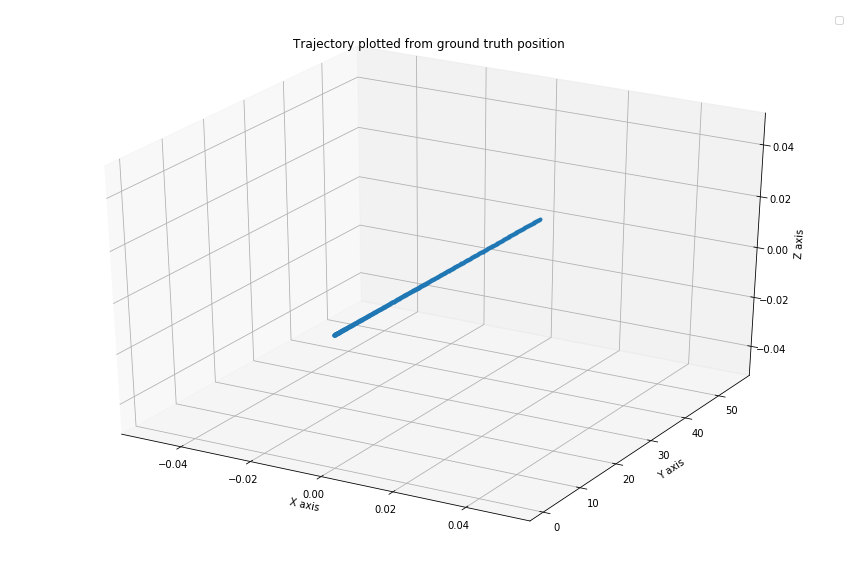

In [4]:
fig = plt.figure(figsize=(15,10))
axplot = fig.gca(projection='3d')
axplot.set_title("Trajectory plotted from ground truth position")
axplot.plot(px, py, pz, '.')
axplot.legend()
axplot.set_xlabel('X axis')
axplot.set_ylabel('Y axis')
axplot.set_zlabel('Z axis')
plt.show()

## Generate Ax, Ay, Az from ground truth IMU measurement
- This step is to verify the conept
- Ax, Ay, Az can be calculated from ax, ay, az if orientaion is given
- Initial orientation is necessary to calculate the following orientation from gyroscope
- yaw, pitch roll of an object at time[0] = ?

#### First, visualize the difference between acceleration in body frame and world frame

368
367


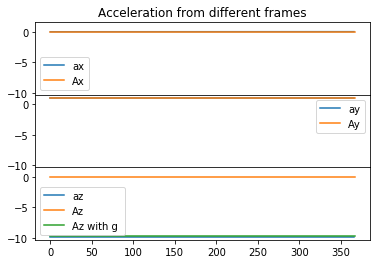

In [5]:
# Acceleration from different frames
fig, (axplot1, axplot2, axplot3) = plt.subplots(3, sharex=True, sharey=True)
axplot1.plot(ax, label='ax')
axplot1.plot(Ax, label='Ax')
axplot1.set_title('Acceleration from different frames')
axplot1.legend()
axplot2.plot(ay, label='ay')
axplot2.plot(Ay, label='Ay')
axplot2.legend()
axplot3.plot(az, label='az')
axplot3.plot(Az, label='Az')
axplot3.plot(np.array(Ax)-9.8, label='Az with g ')
axplot3.legend()
fig.subplots_adjust(hspace=0)


print(len(Ax))
print(len(ax))
# plt.plot(np.array(ax)- np.array(Ax))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.000741310349986, 0.000785398080984, 0.000829031297788, 0.000872664513014, 0.000915843215055, 0.000959930939508, 0.0010035641495, 0.00104719735758, 0.00109037605223, 0.00113446376879]


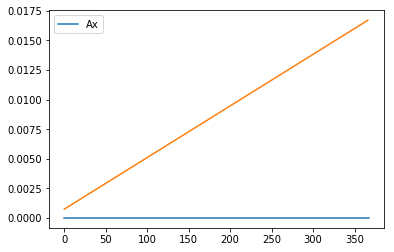

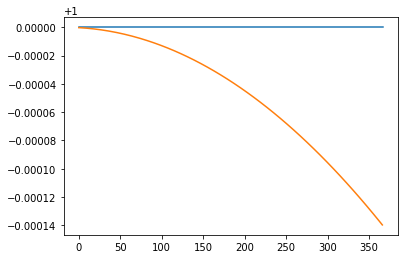

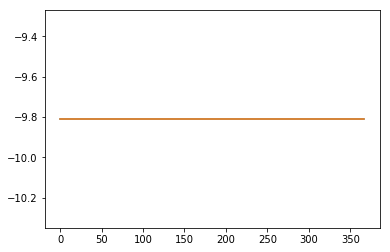

In [134]:
print(Ax[0:10])
print(ax[0:10])
Azg = np.array(Az) - 9.81

plt.plot(Ax, label = 'Ax')
plt.plot(ax)
plt.legend()
plt.show()
plt.plot(Ay,label = 'Ay')
plt.plot(ay)
plt.show()
plt.plot(Azg,label = 'Azg')
plt.plot(az)
plt.show()


[[ 9.99999996e-01 -5.12570481e-05  7.47896568e-05]
 [ 5.12570502e-05  9.99999999e-01 -2.74361306e-08]
 [-7.47896553e-05  3.12696277e-08  9.99999997e-01]]


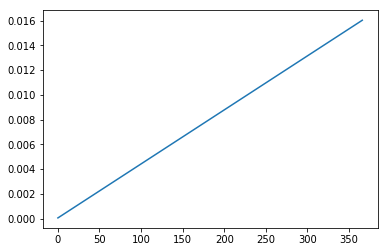

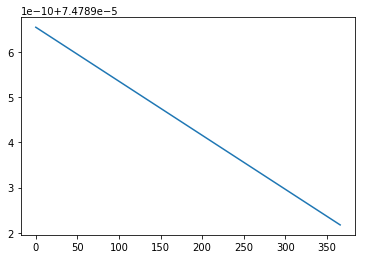

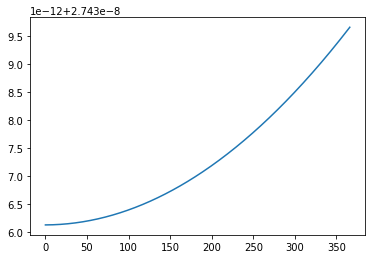

[[ 9.99999996e-01 -5.12570481e-05  7.47896568e-05]
 [ 5.12570502e-05  9.99999999e-01 -2.74361306e-08]
 [-7.47896553e-05  3.12696277e-08  9.99999997e-01]]
original A:  [0.0, 1.0, -9.81]
predicted a:  [ 7.84943568e-04  9.99999692e-01 -9.81000000e+00]
R:  [[ 9.99999996e-01 -5.12570481e-05  7.47896568e-05]
 [ 5.12570502e-05  9.99999999e-01 -2.74361306e-08]
 [-7.47896553e-05  3.12696277e-08  9.99999997e-01]]
oiginal a: 0.000741310349986 0.999999725229 -9.81
original A:  [0.0, 1.0, -9.81]
predicted a:  [ 8.28576785e-04  9.99999657e-01 -9.81000000e+00]
R:  [[ 9.99999993e-01 -9.48902788e-05  7.47896568e-05]
 [ 9.48902812e-05  9.99999995e-01 -2.74361306e-08]
 [-7.47896538e-05  3.45329419e-08  9.99999997e-01]]
oiginal a: 0.000785398080984 0.999999691575 -9.81


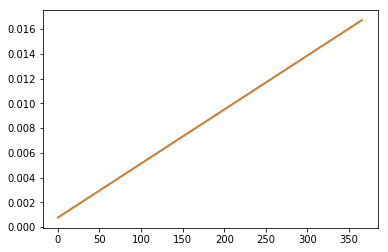

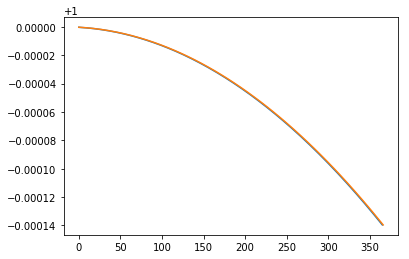

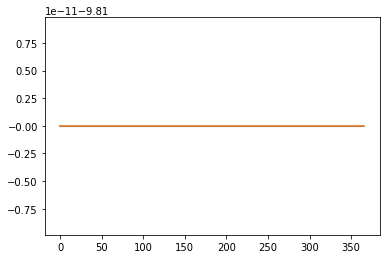

367


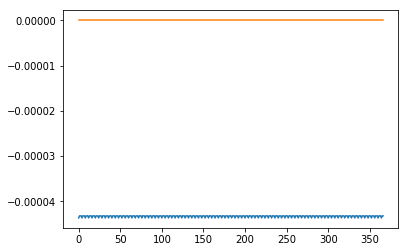

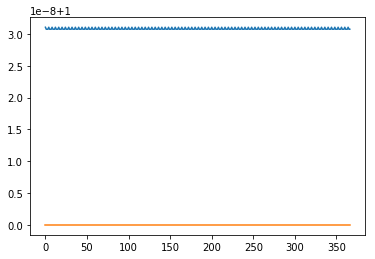

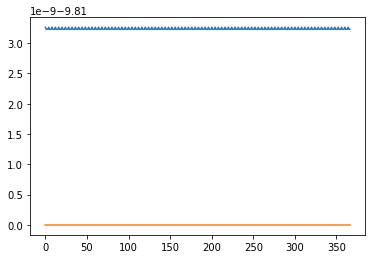

In [137]:
from a3muse import IntegrationRK4, QuatToRotMat, quatNormalized, AccMagOrientation, QuatToEuler
from quaternionClass import QuaternionClass


v1 = [ax[0], ay[0], az[0]]
v2 = [Ax[0], Ay[0], Azg[0]]
 
R = find_R(v1, v2)
quatfromaA = quatNormalized(RotMatToQuat(np.array(R)))
quat = QuaternionClass(quatfromaA[0],quatfromaA[1],quatfromaA[2],quatfromaA[3])

    
omega0 = [gx[0], gy[0], gz[0]]

yaws = []
pitchs = []
rolls = []
rot_mat = []


for i in range(len(gx)):
    omega1 = [gx[i], gy[i], gz[i]] 
    quatG = IntegrationRK4(omega0, omega1, quat, dt)
    omega0 = omega1
    yaw,pitch,roll = QuatToEuler(quatG)
    yaws.append(yaw)
    pitchs.append(pitch)
    rolls.append(roll)
    R = QuatToRotMat(quatG)
    rot_mat.append(R)
    if i == 0:
        print(R)
#     print(R)
    quat = quatG
    
    
    
plt.plot(yaws)
plt.show()
plt.plot(pitchs)
plt.show()
plt.plot(rolls)
plt.show()
    
print(rot_mat[0])

    
axs = []
ays = []
azs = []

for i in range(len(ax)-1):
    v1 = [Ax[i+1], Ay[i+1], Azg[i+1]]
    R = rot_mat[i]
    
    v2 = np.array(np.mat(inv(R)*np.mat(v1).T).T)[0]

    
    if i < 2: 
        print("original A: ", v1)
        print("predicted a: ", v2)
        print("R: ", rot_mat[i])
        print("oiginal a:", ax[i], ay[i], az[i])

#     v2 = np.array(np.mat(unit_vector(R*np.mat(v1).T)).T)[0]
    axs.append(v2[0])
    ays.append(v2[1])
    azs.append(v2[2])

plt.plot(axs)
plt.plot(ax)
plt.show()
plt.plot(ays)
plt.plot(ay)
plt.show()
plt.plot(azs)
plt.plot(az)
plt.show()







print(len(rot_mat))
s_Ax = Ax[1:]
s_Ay = Ay[1:]
s_Azg = Azg[1:]
Axs = []
Ays = []
Azs = []


for i in range(len(ax)):
    
    v1 = [ax[i], ay[i], az[i]]
#     print("original a: ",v1)
    R = rot_mat[i]
    v2 = np.array(np.mat(R*np.mat(v1).T).T)[0]
#     print("predicted A: ", v2)
#     print("original A: ",s_Ax[i], s_Ay[i], s_Az[i])
    Axs.append(v2[0])
    Ays.append(v2[1])
    Azs.append(v2[2])

plt.plot(Axs)
plt.plot(s_Ax)
plt.show()
plt.plot(Ays)
plt.plot(s_Ay)
plt.show()
plt.plot(Azs)
plt.plot(s_Azg)
plt.show()




    
# # print(R)
# print("unitvector of v1")
# print(unit_vector(v1))
# print("calculated unitvector of v1")
# print(np.mat(inv(R)*np.mat(v2).T).T)
# print("unitvector of v2")
# print(unit_vector(v2))
# print("calculated unit vector of v2")
# print(np.mat(unit_vector(R*np.mat(v1).T)).T)
    
    
    

#     omega1 = [gx[i], gy[i], gz[i]] 
#     quatG = IntegrationRK4(omega0, omega1, quat, dt)
#     yaw,pitch,roll = QuatToEuler(quatG)
    
# #     print("yaw")
# #     print(yaw)
# #     print("eulertoquat")
# #     print(EulerToQuat(yaw,pitch,roll))
#     total_yaw += yaw
#     yaw_array.append(yaw)
# #     print(yaw)
# #     print("quatG")
# #     print("quatfromG: ", quatG[0], quatG[1], quatG[2], quatG[3])

#     quat = quatG
# #     n_quat = quatNormalized([quatG[0],quatG[1],quatG[2],quatG[3]])
# #     print(n_quat[3])
    
# #     print("quatfromG: ", quat[0], quat[1], quat[2], quat[3])
#     qz.append(quat[3])
# #     print(yaw)
#     omega0 = omega1

#     R = find_R(v1, v2)
#     quatfromaA = quatNormalized(RotMatToQuat(np.array(R)))
#     yaw,pitch,roll = QuatToEuler(quatfromaA)
# #     print(yaw)
#     yaw_accel.append(yaw)
